In [1]:
library(fpp3)

── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.3
✔ dplyr       1.1.3     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.0     ✔ feasts      0.3.1
✔ lubridate   1.9.3     ✔ fable       0.3.3
✔ ggplot2     3.4.3     ✔ fabletools  0.3.4

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



In [3]:
head(tourism)

Quarter,Region,State,Purpose,Trips
<qtr>,<chr>,<chr>,<chr>,<dbl>
1998 Q1,Adelaide,South Australia,Business,135.0777
1998 Q2,Adelaide,South Australia,Business,109.9873
1998 Q3,Adelaide,South Australia,Business,166.0347
1998 Q4,Adelaide,South Australia,Business,127.1605
1999 Q1,Adelaide,South Australia,Business,137.4485
1999 Q2,Adelaide,South Australia,Business,199.9126


In [6]:
# Compute the means of all the series in the Australian tourism data

tourism|>features(Trips, list(mean=mean))|>arrange(mean)

Region,State,Purpose,mean
<chr>,<chr>,<chr>,<dbl>
Kangaroo Island,South Australia,Other,0.3403467
MacDonnell,Northern Territory,Other,0.4490043
Wilderness West,Tasmania,Other,0.4782684
Barkly,Northern Territory,Other,0.6323856
Clare Valley,South Australia,Other,0.8977490
Barossa,South Australia,Other,1.0215210
Kakadu Arnhem,Northern Territory,Other,1.0426531
Lasseter,Northern Territory,Other,1.1357961
Wimmera,Victoria,Other,1.1462369


In [7]:
# From the above we can clearly see that the least visited place was kangaroo island in SA

In [ ]:
# Rather than computing one feature at a time, it is convenient to compute many features at once. 

tourism |>features(Trips, quantile)

In [ ]:
# apply the feat_acf function to the tourism data
tourism |> features(Trips, feat_acf)

4.3 ---- STL Features

In [11]:
# a time series decompositon can be used to measure the strength of trend and seasonality in a time series


#  can be decomposed into Trend, Season and Remainder

# For strongly trended dta, the seasonally adjusted data should have much more variation than the remainder component

# strength of trend = variance(remainder)/variance(trend + season)


# strength of seasonality = variance(remainder)/variance(season + remainder)


tourism |> features(Trips, feat_stl)

Region,State,Purpose,trend_strength,seasonal_strength_year,seasonal_peak_year,seasonal_trough_year,spikiness,linearity,curvature,stl_e_acf1,stl_e_acf10
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adelaide,South Australia,Business,0.4638070,0.4069585,3,1,1.584763e+02,-5.3126332,71.5841775,-0.5323114,0.5939747
Adelaide,South Australia,Holiday,0.5542186,0.6187292,1,2,9.167156e+00,49.0407477,78.7415934,-0.5104023,0.5608486
Adelaide,South Australia,Other,0.7457291,0.2020916,2,1,2.097208e+00,95.0866802,43.3978084,-0.3513377,0.4033702
Adelaide,South Australia,Visiting,0.4354986,0.4518154,1,3,5.612952e+01,34.5767879,71.3754529,-0.5009820,1.0070351
Adelaide Hills,South Australia,Business,0.4641066,0.1793947,3,0,1.029723e-01,0.9684728,-3.2189933,-0.5998442,0.4966204
Adelaide Hills,South Australia,Holiday,0.5275212,0.2958543,2,1,1.766451e-01,10.4637483,23.9970281,-0.4805950,0.3497724
Adelaide Hills,South Australia,Other,0.5934844,0.4038795,2,2,4.440051e-04,4.2772573,3.1857325,-0.2975733,0.2814562
Adelaide Hills,South Australia,Visiting,0.4879478,0.2539251,0,3,6.497662e+00,34.2265062,-0.5294727,-0.4716180,0.4459566
Alice Springs,Northern Territory,Business,0.5339263,0.2510186,0,1,1.693929e-01,23.7586211,19.5455893,-0.4916997,0.5479442


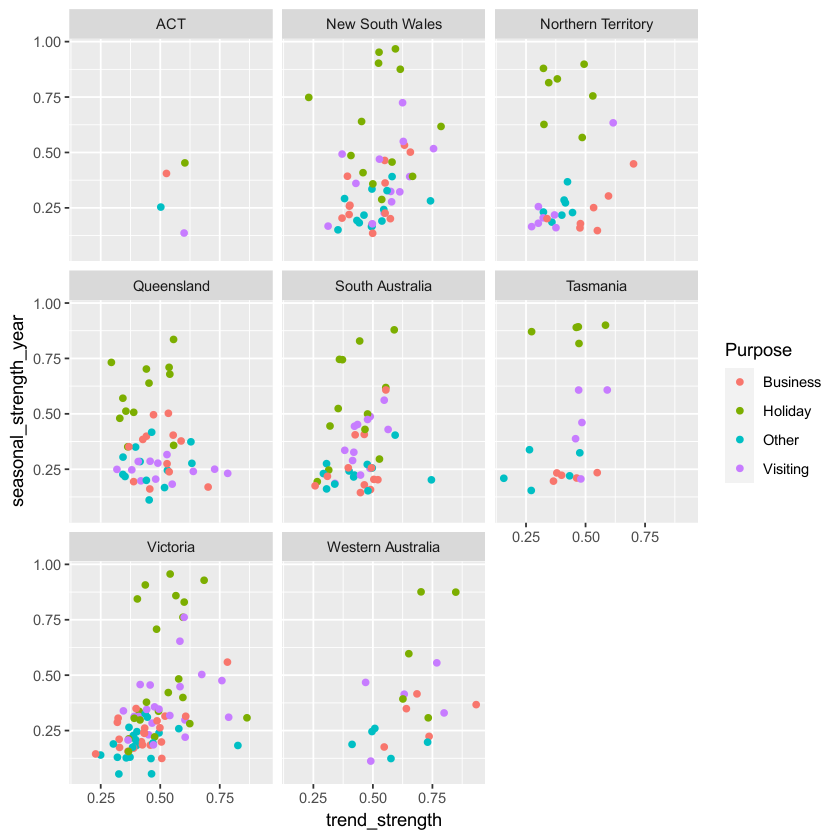

In [14]:
tourism |> features(Trips, feat_stl)|> ggplot(aes(x = trend_strength, y = seasonal_strength_year, col = Purpose)) + geom_point() + facet_wrap(vars(State))

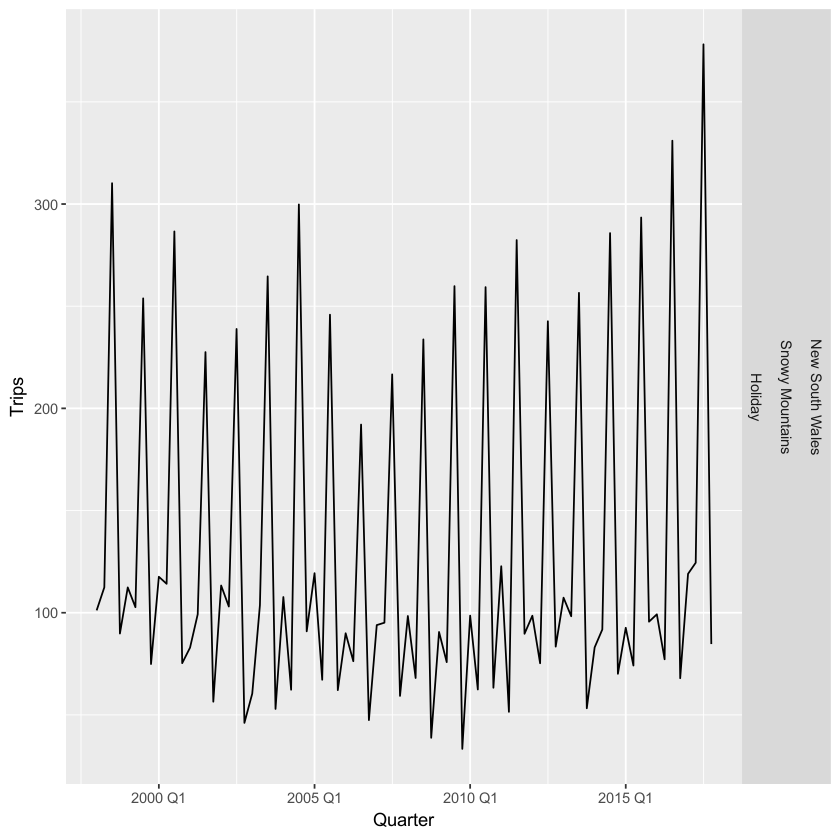

In [15]:
# Clearly , holiday series are most seasonal which is unsurprising 

## The strongest trends ten to be in Western Australia and Victoria.

tourism |>
  features(Trips, feat_stl) |>
  filter(
    seasonal_strength_year == max(seasonal_strength_year)
  ) |>
  left_join(tourism, by = c("State", "Region", "Purpose"), multiple = "all") |>
  ggplot(aes(x = Quarter, y = Trips)) +
  geom_line() +
  facet_grid(vars(State, Region, Purpose))

4.5 -- Exploring Australian tourism data



In [16]:
tourism_features <- tourism|>features(Trips, feature_set(pkgs="feasts"))

Warning message:
“`n_flat_spots()` was deprecated in feasts 0.1.5.
ℹ Please use `longest_flat_spot()` instead.
ℹ The deprecated feature was likely used in the fabletools package.
  Please report the issue at <https://github.com/tidyverts/fabletools/issues>.”
Warning message:
“304 errors (1 unique) encountered for feature 6
[304] The `urca` package must be installed to use this functionality. It can be installed with install.packages("urca")
”
Warning message:
“304 errors (1 unique) encountered for feature 7
[304] The `urca` package must be installed to use this functionality. It can be installed with install.packages("urca")
”
Warning message:
“304 errors (1 unique) encountered for feature 8
[304] The `urca` package must be installed to use this functionality. It can be installed with install.packages("urca")
”
Warning message:
“304 errors (1 unique) encountered for feature 20
[304] The `fracdiff` package must be installed to use this functionality. It can be installed with install.pac

In [17]:
tourism_features

Region,State,Purpose,trend_strength,seasonal_strength_year,seasonal_peak_year,seasonal_trough_year,spikiness,linearity,curvature,⋯,shift_level_max,shift_level_index,shift_var_max,shift_var_index,shift_kl_max,shift_kl_index,spectral_entropy,n_crossing_points,longest_flat_spot,stat_arch_lm
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
Adelaide,South Australia,Business,0.4638070,0.4069585,3,1,1.584763e+02,-5.3126332,71.5841775,⋯,69.558469,28,4383.15988,31,3.393246,27,0.8433183,43,4,0.182907074
Adelaide,South Australia,Holiday,0.5542186,0.6187292,1,2,9.167156e+00,49.0407477,78.7415934,⋯,60.047999,2,3778.85614,3,1.876747,41,0.7526746,36,3,0.161044959
Adelaide,South Australia,Other,0.7457291,0.2020916,2,1,2.097208e+00,95.0866802,43.3978084,⋯,30.255541,63,754.48986,74,8.890109,73,0.7930121,28,3,0.455923188
Adelaide,South Australia,Visiting,0.4354986,0.4518154,1,3,5.612952e+01,34.5767879,71.3754529,⋯,45.772850,2,2635.01493,66,2.208410,3,0.7681266,42,2,0.173339732
Adelaide Hills,South Australia,Business,0.4641066,0.1793947,3,0,1.029723e-01,0.9684728,-3.2189933,⋯,10.828389,31,163.26490,24,27.793506,73,0.9907541,36,10,0.014361854
Adelaide Hills,South Australia,Holiday,0.5275212,0.2958543,2,1,1.766451e-01,10.4637483,23.9970281,⋯,13.799192,13,231.43332,11,7.745780,11,0.9278848,33,3,0.120526812
Adelaide Hills,South Australia,Other,0.5934844,0.4038795,2,2,4.440051e-04,4.2772573,3.1857325,⋯,3.318040,74,13.14020,71,14.216126,65,0.9134033,37,5,0.265442881
Adelaide Hills,South Australia,Visiting,0.4879478,0.2539251,0,3,6.497662e+00,34.2265062,-0.5294727,⋯,18.980151,20,1291.05628,18,46.892803,20,1.0000000,25,9,0.004940571
Alice Springs,Northern Territory,Business,0.5339263,0.2510186,0,1,1.693929e-01,23.7586211,19.5455893,⋯,9.697407,3,101.75420,19,5.515313,44,0.9438916,33,3,0.424877904


In [19]:
install.packages("urca")
install.packages("fracdiff")